<a href="https://colab.research.google.com/github/brnak/FIT-IAL-DU-2/blob/main/K%C3%B3pia_z%C3%A1pisn%C3%ADka_ISS_ECGProject_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 2. Teorie - před odevzdáním prosíme smazat včetně ilustračních obrázků.

Pokud znáte základní teorii okolo EKG signálů, můžete tuhle část přeskočit. Teorie je doopravdy stručná, neboť teorie EKG není cílem tohoto předmětu.

EKG signál má několik základních částí:
  

1.   P vlnu, která značí počátek kontrakce předsíní
2.   QRS komplex vln, který vzniká depolarizací komor (jejich stažením)
3.   T vlna jako poslední představuje repolarizaci komor (tedy jejich zpětné roztažení)

Nás bude zajímat především QRS komplex, který se ve spektru nachází mezi 10 Hz a 20 Hz. Z polohy QRS lze určit RR interval - vzdálenost mezi jednotlivými R vlnami. RR interval je přímo spojený se srdečním tepem. Na obrázku spektra EKG signálu můžete také vidět, na kterých frekvencích se nachází P a T vlna, kterou my ale v projektu odfiltrujeme.

EKG se snímá v několika základních rozloženích elektrodových svodů. V nemocnici se potkáte nejčastěji s 12 svodovým EKG. V projektu dostanete jeden z těchto svodů.


#### Popis EKG





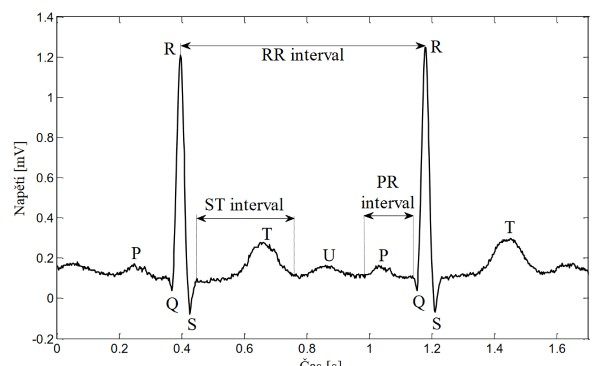

#### EKG ve spektru

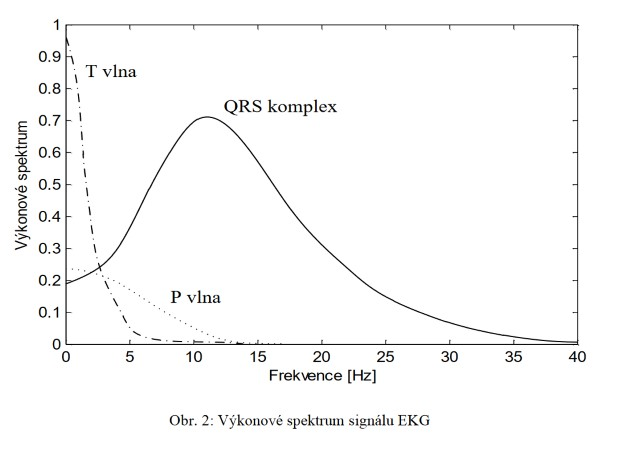

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [48]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xbrnak01.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

x, fs = sf.read("xbrnak01.wav")


--2023-12-07 22:30:51--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xbrnak01.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘xbrnak01.wav.2’

xbrnak01.wav.2      100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-07 22:30:53 (109 MB/s) - ‘xbrnak01.wav.2’ saved [10044/10044]

--2023-12-07 22:30:53--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘FIB.wav.2’

FIB.wav.2           100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-0

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

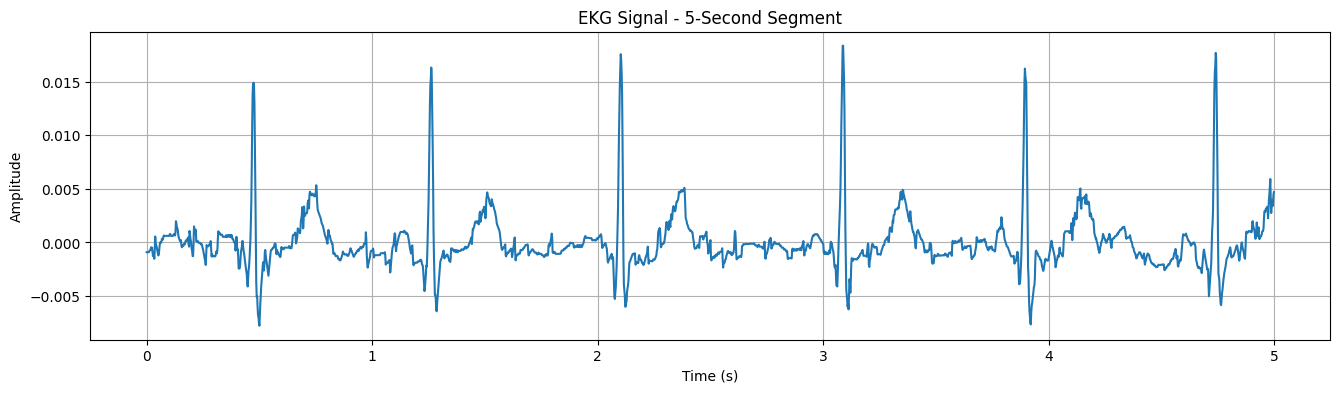

In [49]:
# Zde napište váš kód

import numpy as np
import matplotlib.pyplot as plt


# Select a 5-second segment
segment_duration = 5  # in seconds
segment_samples = segment_duration * fs
ekg_segment = x[:segment_samples]

# Create time axis for the segment
time = np.arange(0, segment_samples) / fs

# Plot the EKG signal in the time domain
plt.figure(figsize=(16, 4))
plt.plot(time, ekg_segment)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EKG Signal - 5-Second Segment')
plt.grid(True)
plt.show()

b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

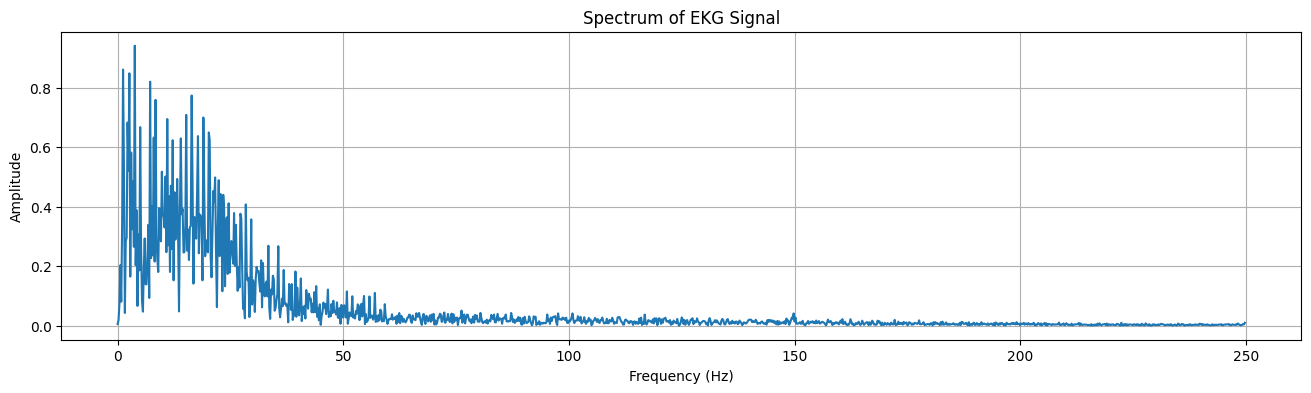

In [50]:
# Zde napište váš kód
from scipy.fft import fft, fftfreq

# Compute the FFT
ekg_fft = fft(ekg_segment)

# Frequency axis
n = len(ekg_segment)
freq = fftfreq(n, d=1/fs)

# Plotting the spectrum
plt.figure(figsize=(16, 4))
plt.plot(freq[:n//2], np.abs(ekg_fft)[:n//2])  # Plotting positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of EKG Signal')
plt.grid(True)
plt.show()


 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

*Zde napište vaše řešení.*

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

In [51]:
from scipy.signal import decimate

# Převzorkování signálu s eliminací fázového posuvu
decimated_signal = decimate(x, int(fs / 100), zero_phase=True)

b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

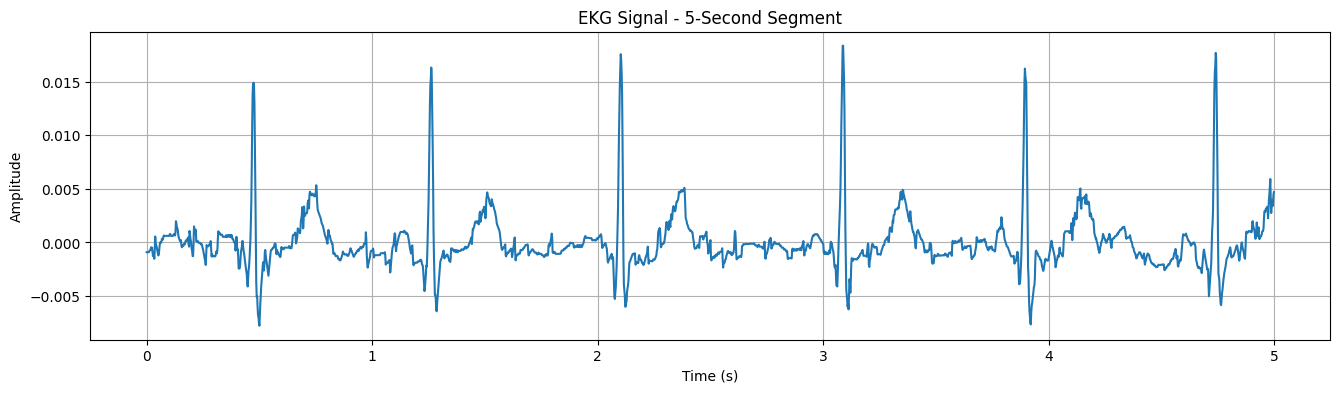

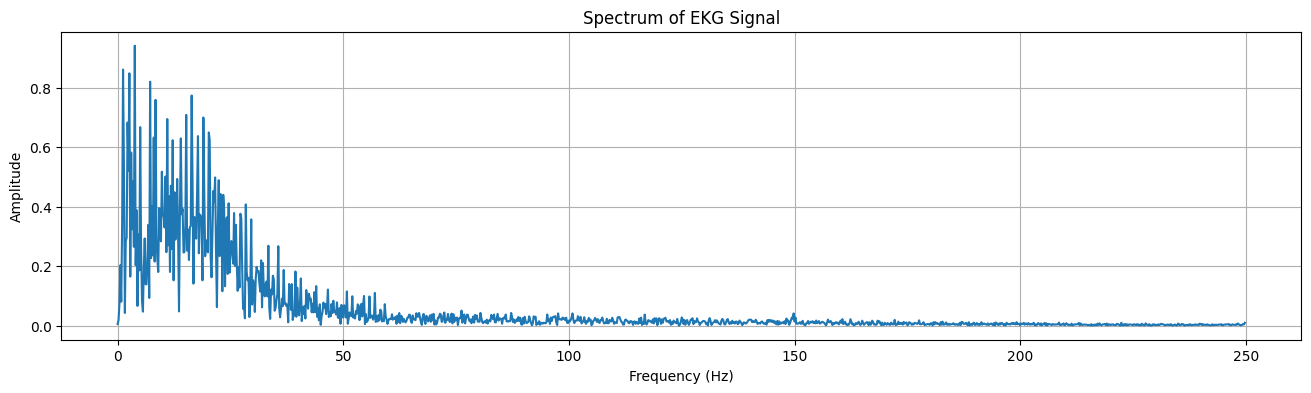

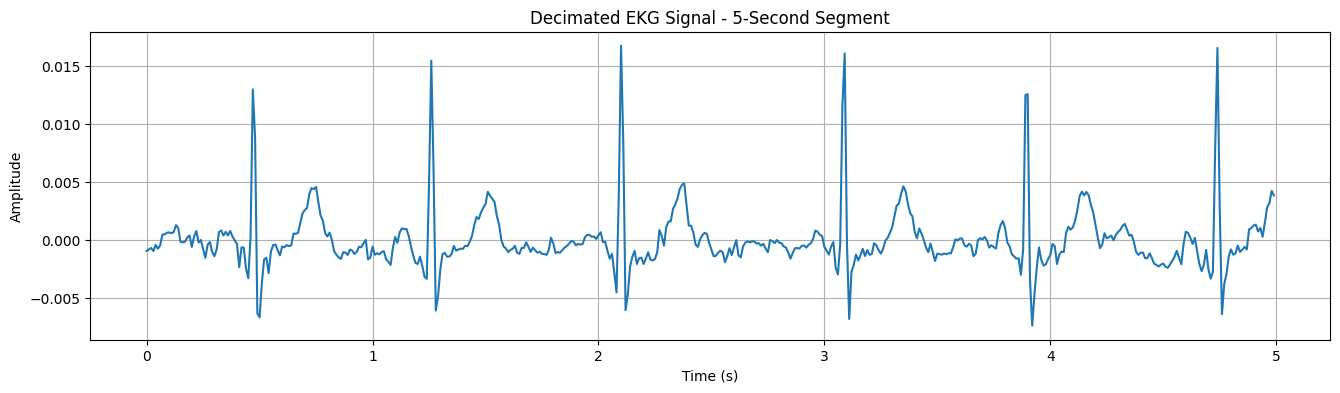

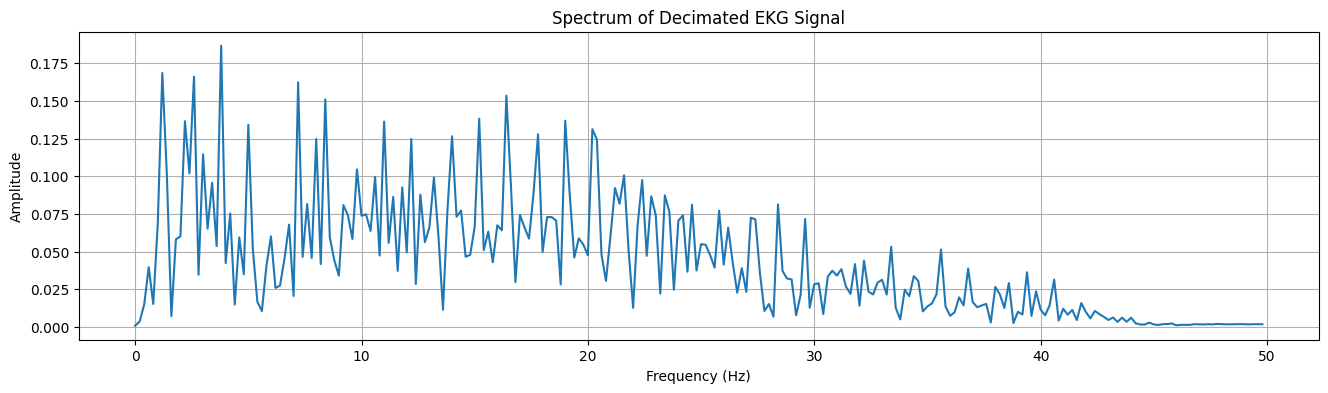

In [52]:
# Zde napište váš kód



# Plot the EKG signal in the time domain
plt.figure(figsize=(16, 4))
plt.plot(time, ekg_segment)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EKG Signal - 5-Second Segment')
plt.grid(True)
plt.show()


# Plotting the spectrum
plt.figure(figsize=(16, 4))
plt.plot(freq[:n//2], np.abs(ekg_fft)[:n//2])  # Plotting positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of EKG Signal')
plt.grid(True)
plt.show()

# Nová frekvence vzorkování po převzorkování
new_fs = 100

# Vybereme 5-sekundový úsek z převzorkovaného signálu
decimated_segment = decimated_signal[:int(5 * new_fs)]

# Vytvoříme časovou osu pro segment
time_decimated = np.arange(0, len(decimated_segment)) / new_fs

# Zobrazíme převzorkovaný signál v časové doméně
plt.figure(figsize=(16, 4))
plt.plot(time_decimated, decimated_segment)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Decimated EKG Signal - 5-Second Segment')
plt.grid(True)
plt.show()

# Výpočet FFT pro převzorkovaný signál
decimated_fft = fft(decimated_segment)

# Vytvoříme frekvenční osu pro převzorkovaný signál
n_decimated = len(decimated_segment)
freq_decimated = fftfreq(n_decimated, d=1/new_fs)

# Zobrazíme spektrum převzorkovaného signálu
plt.figure(figsize=(16, 4))
plt.plot(freq_decimated[:n_decimated//2], np.abs(decimated_fft)[:n_decimated//2])  # Pouze kladné frekvence
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of Decimated EKG Signal')
plt.grid(True)
plt.show()





### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

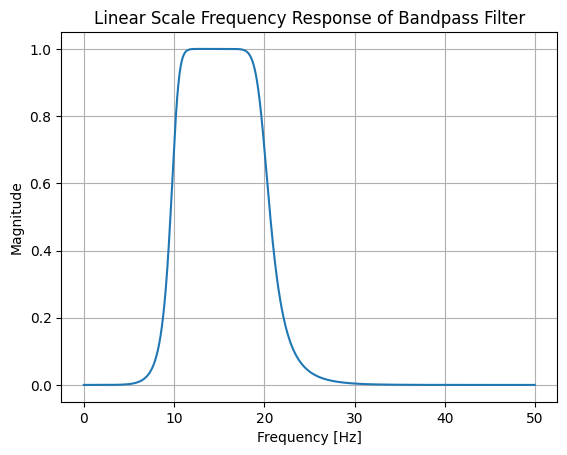

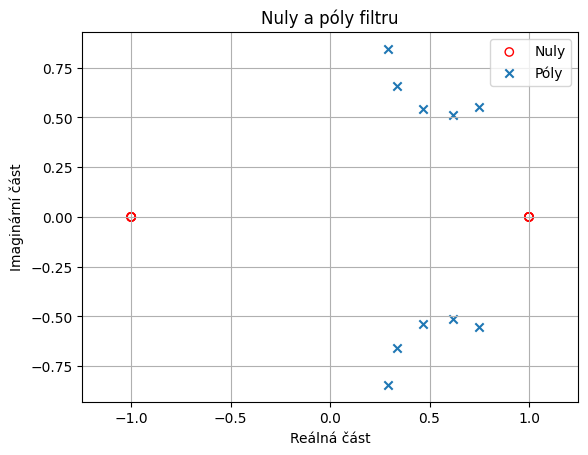

In [53]:
# Zde napište váš kód
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfilt, sosfreqz, tf2zpk

# Parametry filtru
fs = 100  # Vzorkovací frekvence signálu, přizpůsobte dle vašeho signálu
lowcut = 10  # Dolní hranice pásmové propusti
highcut = 20  # Horní hranice pásmové propusti

# Návrh filtru
sos = butter(N=5, Wn=[lowcut, highcut], btype='band', fs=fs, output='sos')


# Compute the frequency response of the filter
w, h = sosfreqz(sos, worN=2000, fs=fs)

# Plot the frequency response on a linear scale
plt.figure()
plt.plot(w, np.abs(h))  # Magnitude of the frequency response
plt.title('Linear Scale Frequency Response of Bandpass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

from scipy.signal import sos2tf

# Převod SOS na přenosovou funkci
b, a = sos2tf(sos)

# Získání a zobrazení nul a pólů
z, p, k = tf2zpk(b, a)
plt.figure()
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='Nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', label='Póly')
plt.title('Nuly a póly filtru')
plt.xlabel('Reálná část')
plt.ylabel('Imaginární část')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()



  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


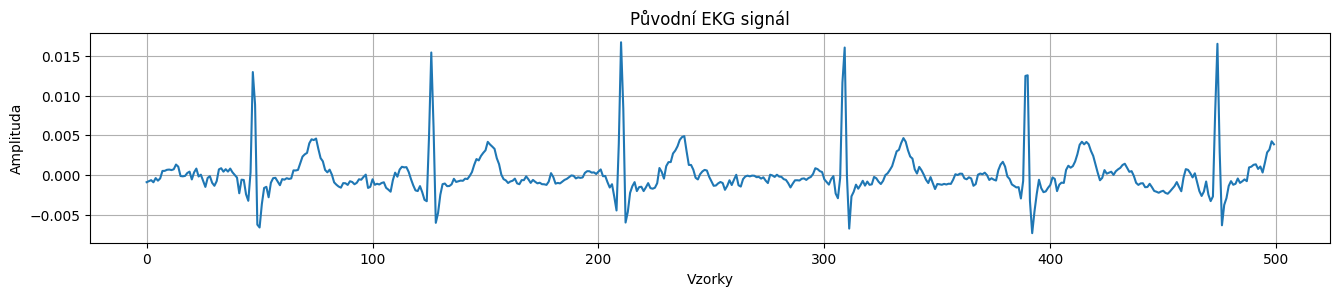

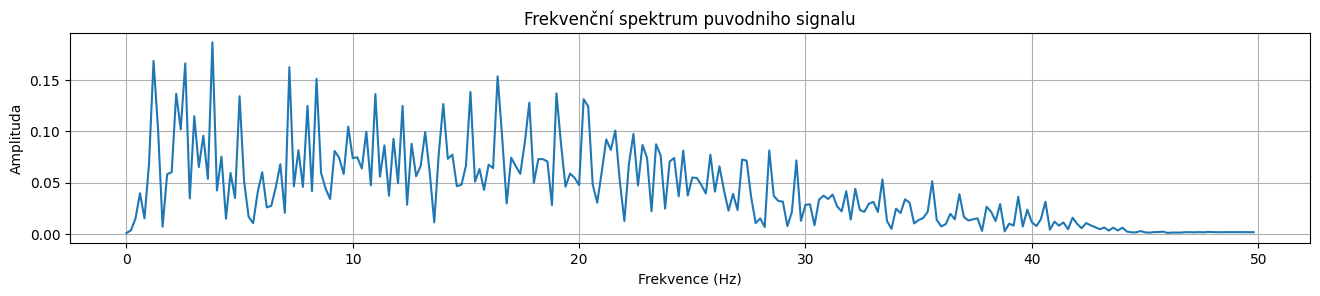

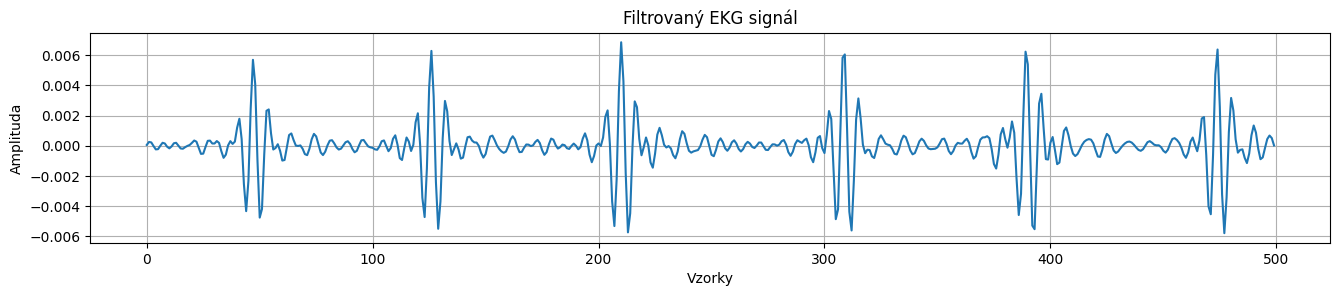

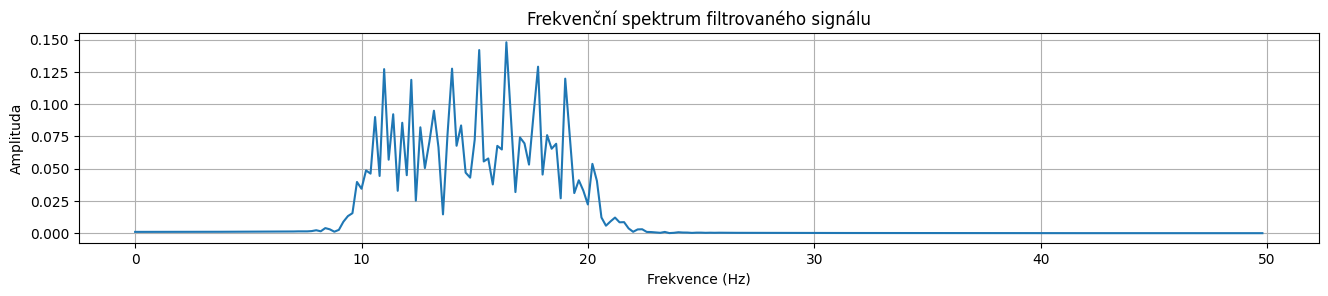

In [54]:
# Zde napište váš kód

from scipy.signal import sosfiltfilt
from scipy.fft import fft, fftfreq

# Filtrování signálu
filtered_signal = sosfiltfilt(sos, decimated_segment)  # Nahraďte ekg_signal vaším EKG signálem

# Výpočet FFT
fft_result = fft(filtered_signal)

# Výpočet frekvencí
n = len(filtered_signal)
freq = fftfreq(n, d=1/fs)

#vykresleni signalu
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 1)
plt.plot(decimated_segment)
plt.title('Původní EKG signál')
plt.xlabel('Vzorky')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Vykreslení spektra
plt.figure(figsize=(16, 6))
plt.subplot(2,1,2)
plt.plot(freq[:n // 2], np.abs(decimated_fft)[:n // 2])  # Zobrazujeme pouze kladné frekvence
plt.title('Frekvenční spektrum puvodniho signalu')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()



#vykresleni filtrovaneho signalu
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 1)
plt.plot(filtered_signal)
plt.title('Filtrovaný EKG signál')
plt.xlabel('Vzorky')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Vykreslení spektra
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 2)
plt.plot(freq[:n // 2], np.abs(fft_result)[:n // 2])  # Zobrazujeme pouze kladné frekvence
plt.title('Frekvenční spektrum filtrovaného signálu')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()


  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?




*Zde napište vaše řešení.*

### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.

Příklad zakreslené detekce (před odevzdáním smažte):

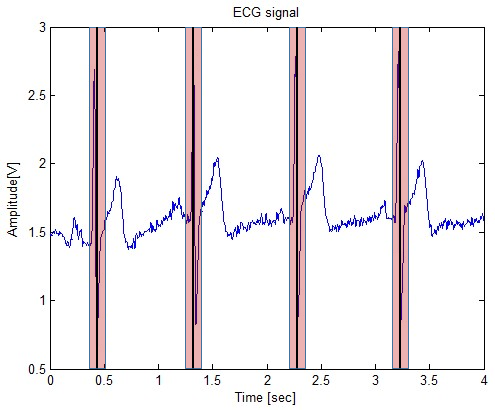

   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

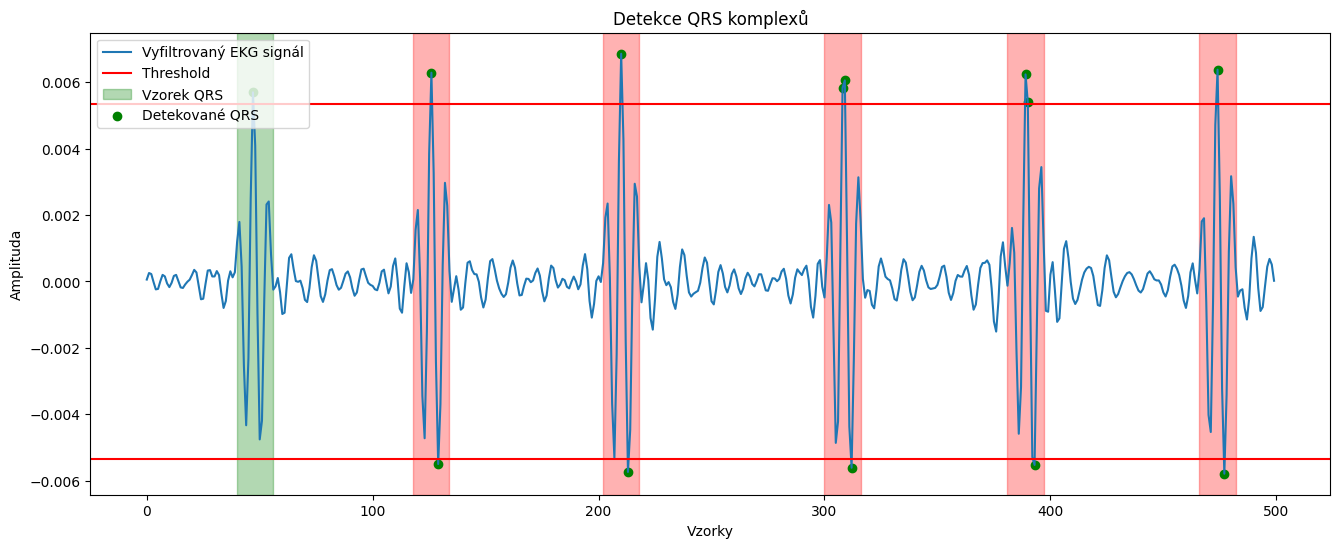

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Předpokládám, že filtered_signal je váš převzorkovaný vyfiltrovaný signál

# 1. Získání vzorku QRS (manuálně)
qrs_sample = filtered_signal[40:56]

# 2. Výpočet maximální amplitudy vzorku QRS
max_amplitude = np.max(np.abs(qrs_sample))

# 3. Nastavení thresholdu
threshold = 0.94 * max_amplitude  # Například 70 % maximální amplitudy

# 4. Detekce QRS komplexů
qrs_peaks = []
for i in range(len(filtered_signal)):
    if abs(filtered_signal[i]) > threshold:
        qrs_peaks.append(i)

# Nastavení minimální vzdálenosti mezi boxy
min_box_distance = len(qrs_sample)

qrs_peaks1 = qrs_peaks



plt.figure(figsize=(16, 6))
plt.plot(filtered_signal, label='Vyfiltrovaný EKG signál')
plt.axhline(y=threshold, color='r', linestyle='-', label='Threshold')
plt.axhline(y=-threshold, color='r', linestyle='-')

plt.axvspan(40, 56, color='green', alpha=0.3, label = "Vzorek QRS")


last_box_end = 60
for peak in qrs_peaks:
    # Zkontrolujte, zda je vrchol dostatečně daleko od posledního vykresleného boxu
    if peak - last_box_end > min_box_distance:
        plt.axvspan(peak - len(qrs_sample) // 2, peak + len(qrs_sample) // 2, color='red', alpha=0.3)
        last_box_end = peak + len(qrs_sample) // 2  # Aktualizujte konec posledního vykresleného boxu

plt.scatter(qrs_peaks, [filtered_signal[j] for j in qrs_peaks], color='g', label='Detekované QRS')
plt.title('Detekce QRS komplexů')
plt.xlabel('Vzorky')
plt.ylabel('Amplituda')
plt.legend()
plt.show()



b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

[ 50  51 130 214 312 393 394 477]


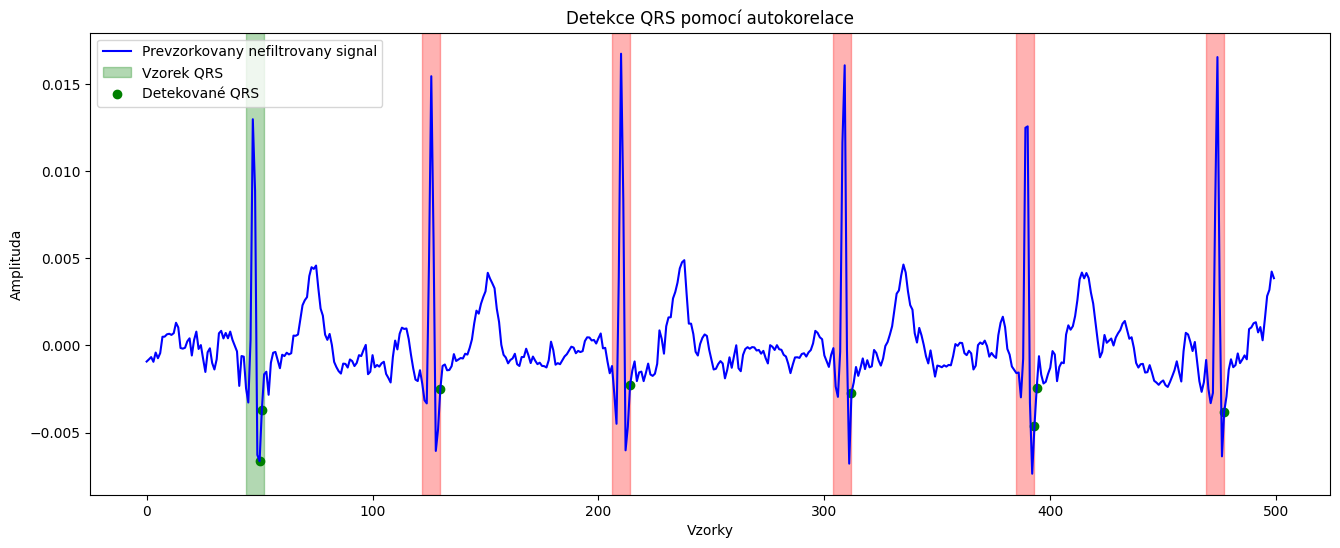

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Předpokládám, že 'decimated_segment' je váš převzorkovaný nefiltrovaný signál

# 1. Získání vzorku QRS (manuálně)
qrs_sample = decimated_segment[38:46]

# 2. Autokorelace signálu s vzorkem QRS
correlated = correlate(decimated_segment, qrs_sample, mode='same')
normalized_correlated = correlated / np.max(correlated)

# 3. Nastavení prahové hodnoty pro detekci
threshold = 0.69  # Toto je hodnota, kterou můžete upravit podle potřeby

# 4. Detekce QRS komplexů
qrs_peaks = np.where(normalized_correlated > threshold)[0]

# 5. Vykreslení signálu a detekce
plt.figure(figsize=(16, 6))
plt.plot(decimated_segment, label='Prevzorkovany nefiltrovany signal', color='blue')

# Zvýraznění vzorku QRS v signálu
plt.axvspan(44, 52, color='green', alpha=0.3, label='Vzorek QRS')
print(qrs_peaks)
qrs_peaks2 = qrs_peaks


min_box_distance = 30
last_box_end = 46

# Označení detekovaných QRS komplexů
for peak in qrs_peaks:
  if (peak - last_box_end > min_box_distance):
    plt.axvspan(peak - len(qrs_sample), peak, color='red', alpha=0.3)
    last_box_end = peak

plt.scatter(qrs_peaks, [decimated_segment[j] for j in qrs_peaks], color='g', label='Detekované QRS')

plt.title('Detekce QRS pomocí autokorelace')
plt.xlabel('Vzorky')
plt.ylabel('Amplituda')
plt.legend()
plt.show()



### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

12


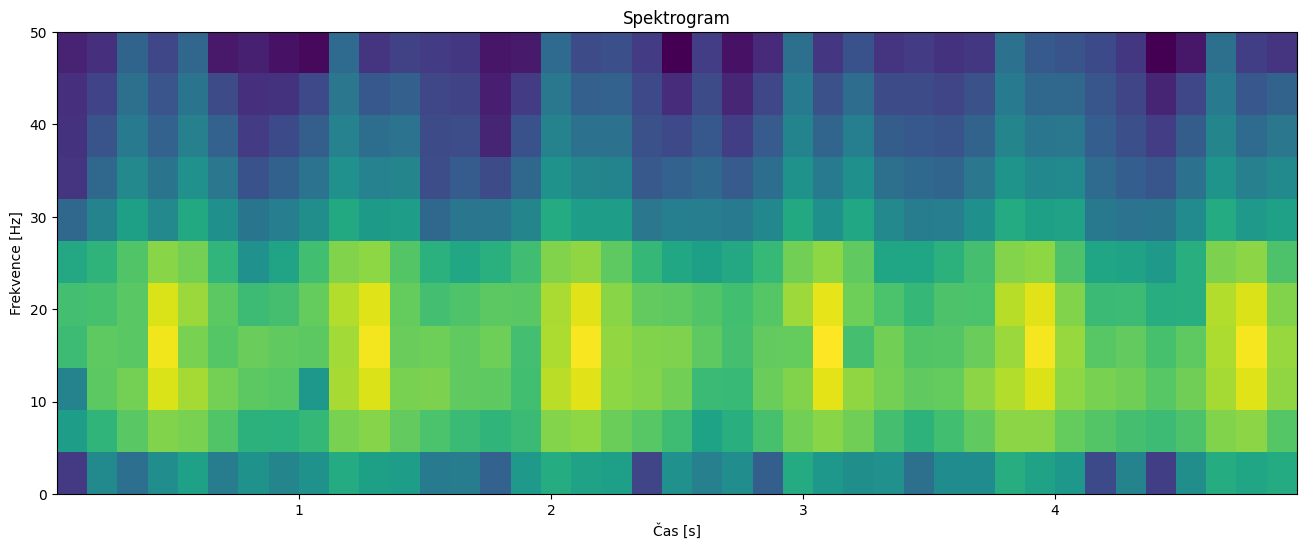

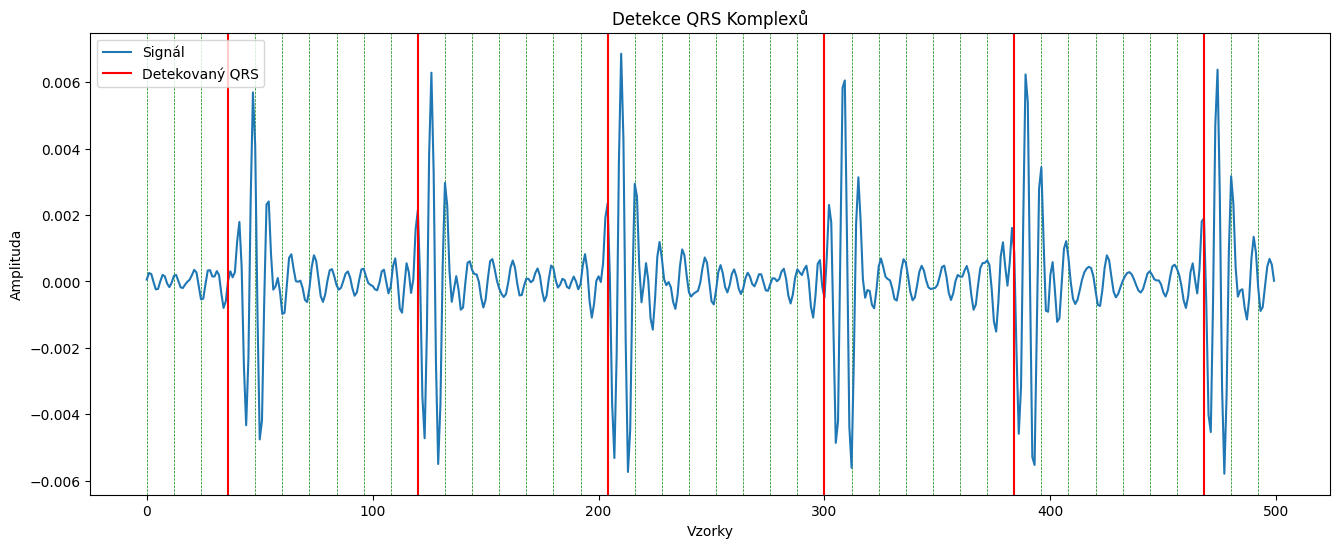

In [78]:
# Zde napište váš kód
fs = 100  # Příklad vzorkovací frekvence v Hz
window_len_samples = int(0.2 * fs)  # 200 ms
hop_size_samples = int(0.12 * fs)  # 120 ms
print(hop_size_samples)

from matplotlib.pyplot import specgram

# Výpočet spektrogramu
plt.figure(figsize=(16, 6))
Pxx, freqs, bins, im = plt.specgram(filtered_signal, NFFT=window_len_samples, Fs=fs, noverlap=window_len_samples - hop_size_samples)
plt.title('Spektrogram')
plt.ylabel('Frekvence [Hz]')
plt.xlabel('Čas [s]')
plt.show()

normalized_Pxx = Pxx / np.max(Pxx, axis=0)

energy_per_bin = np.sum(Pxx, axis=0)


# Předpokládáme, že index prvního QRS komplexu je znám
first_qrs_index = 3  # Příklad
threshold = energy_per_bin[first_qrs_index]


detected_qrs_bins = np.where(energy_per_bin >= threshold)[0]

detected_bins = np.where(energy_per_bin >= threshold)[0]
qrs_peaks3 = [bin_index * 12 for bin_index in detected_bins]



plt.figure(figsize=(16, 6))

time_bins = np.arange(0, len(filtered_signal), hop_size_samples)
for t in time_bins:
    plt.axvline(x=t, color='g', linestyle='--', linewidth=0.5)

plt.plot(filtered_signal, label='Signál')
for bin in detected_qrs_bins:
    plt.axvline(x=bin * hop_size_samples, color='r', label='Detekovaný QRS' if bin == detected_qrs_bins[0] else "")

plt.legend()
plt.title('Detekce QRS Komplexů')
plt.xlabel('Vzorky')
plt.ylabel('Amplituda')
plt.show()





b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

Mělo by to vypadat přibližně takto (před odevzdáním smažte):

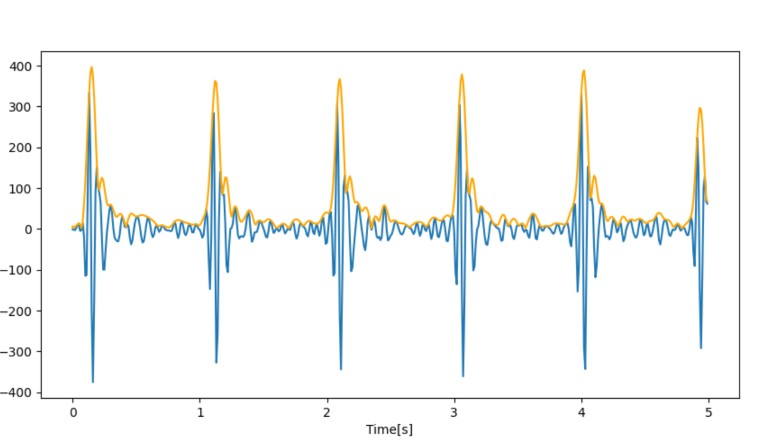

Detekci QRS poté provedete opět prahováním, tentokrát ale obálky signálu.


Při této úloze **nepoužívejte** funkci hilbert z knihovny scipy. Cílem je, abyste si ji napsali sami. Můžete ji použít pouze jako baseline pro porovnání vašich výsledků.



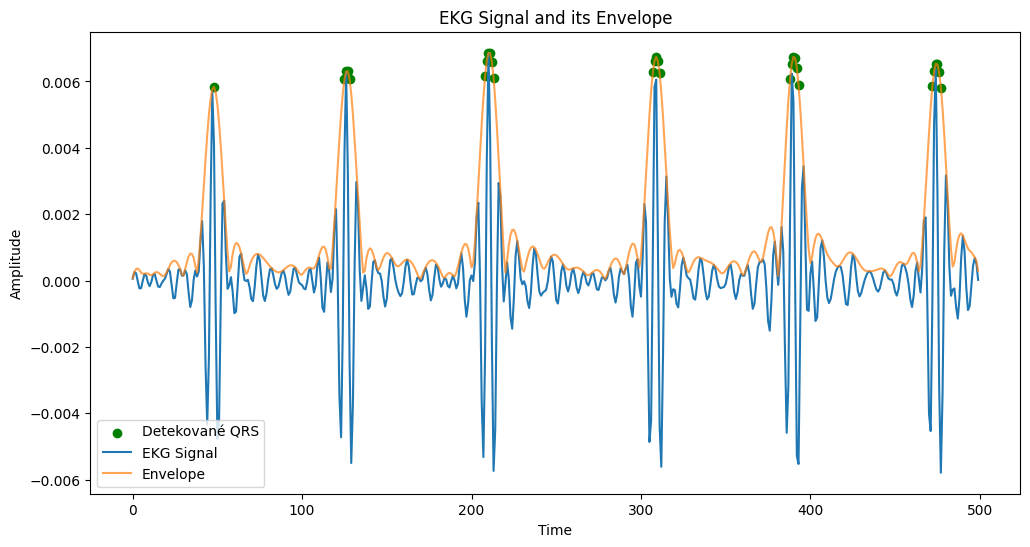

In [58]:
# Zde napište váš kód

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Assuming ekg_signal is your preprocessed EKG signal
# and fs is the sampling frequency

# Step 1: Compute the FFT of the signal
filtered_fft = fft(filtered_signal)

# Step 2: Apply the Heaviside function to zero out the right half of the spectrum
N = len(filtered_fft)
if N % 2 == 0:
    # For even N
    filtered_fft[N//2+1:] = 0
    filtered_fft[1:N//2] *= 2
else:
    # For odd N
    filtered_fft[(N+1)//2:] = 0
    filtered_fft[1:(N+1)//2] *= 2

# Step 3: Compute the inverse FFT
hilbert_signal = ifft(filtered_fft)



# Step 4: Calculate the envelope of the signal
envelope = np.abs(hilbert_signal)

max_amplitude = np.max(np.abs(envelope))
threshold = 0.84*max_amplitude

qrs_peakss = []
for i in range(len(hilbert_signal)):
    if abs(hilbert_signal[i]) > threshold:
        qrs_peakss.append(i)

qrs_peaks4 = qrs_peakss

# Plotting the original EKG signal and its envelope
plt.figure(figsize=(12, 6))
plt.scatter(qrs_peakss, [envelope[j] for j in qrs_peakss], color='g', label='Detekované QRS')
plt.plot(filtered_signal, label='EKG Signal')
plt.plot(envelope, label='Envelope', alpha=0.7)
plt.title('EKG Signal and its Envelope')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

*Zde napište vaše řešení.*

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.

Mělo by to vypadat přibližně takto (před odevzdáním smažte):
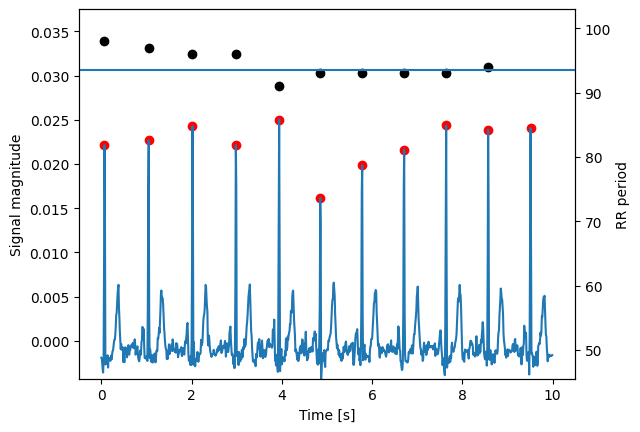

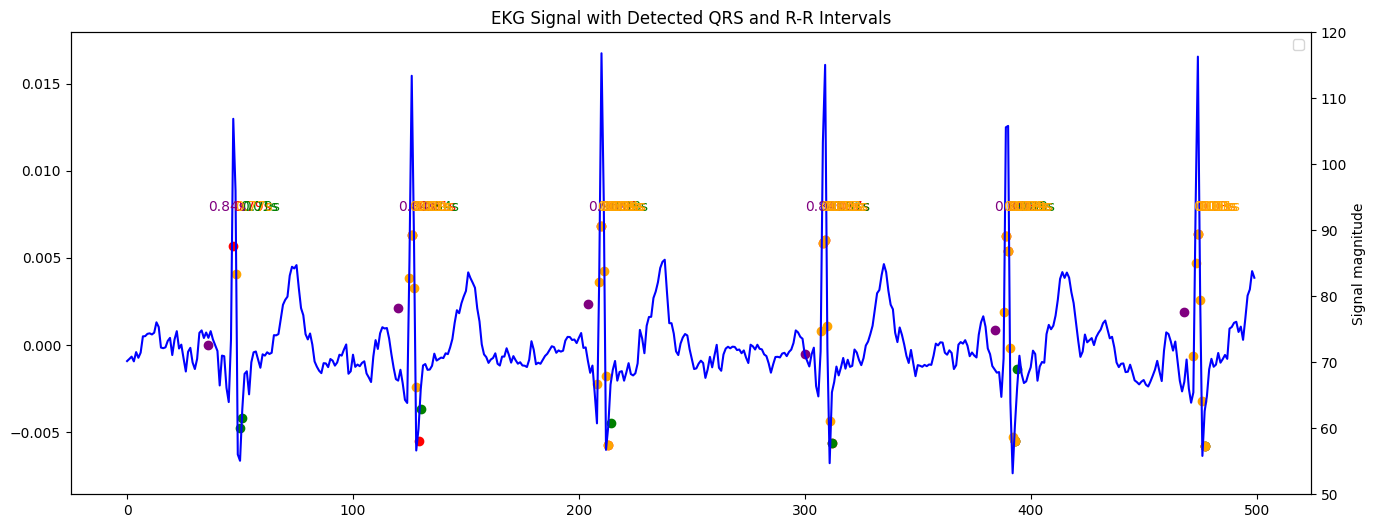

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming filtered_signal and qrs_peakss are available from previous steps
# filtered_signal: The preprocessed EKG signal
# qrs_peaks_method1, qrs_peaks_method2, qrs_peaks_method3: Detected QRS peak indices from different methods

# Create a separate array for each method's R-R intervals
rr_intervals_method1 = np.diff(qrs_peaks1) / fs
rr_intervals_method2 = np.diff(qrs_peaks2) / fs
rr_intervals_method3 = np.diff(qrs_peaks3) / fs
rr_intervals_method4 = np.diff(qrs_peaks4) / fs

# Plot the EKG signal
plt.figure(figsize=(16, 6))
plt.plot(decimated_segment, label='EKG Signal', color='blue')

# Plot detected QRS peaks and R-R intervals for each method
for method_idx, (qrs_peaks, rr_intervals) in enumerate(zip([qrs_peaks1, qrs_peaks2, qrs_peaks3, qrs_peaks4],
                                                           [rr_intervals_method1, rr_intervals_method2, rr_intervals_method3, rr_intervals_method4])):
    # Different color for each method
    colors = ['red', 'green', 'purple', 'orange']
    marker_labels = ['QRS Method 1', 'QRS Method 2', 'QRS Method 3', 'QRS Method 4']

    # Plot each detected QRS peak
    plt.scatter(qrs_peaks, [filtered_signal[p] for p in qrs_peaks], color=colors[method_idx], label=marker_labels[method_idx])

    # Plot R-R intervals
    for i in range(len(rr_intervals)):
        rr_interval = rr_intervals[i]
        x_position = qrs_peaks[i]  # Align with the detected QRS peak
        # Plot R-R interval values above the signal
        plt.text(x_position, 1.1 * np.max(filtered_signal), f'{rr_interval:.2f}s', color=colors[method_idx], verticalalignment='bottom')

# Adding secondary axis for R-R interval values on the right
ax2 = plt.gca().twinx()
ax2.set_ylim(50, 120)  # Assuming R-R interval values are in the range of 50-120 bpm
ax2.set_ylabel('R-R Period [ms]', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('EKG Signal with Detected QRS and R-R Intervals')
plt.xlabel('Time [s]')
plt.ylabel('Signal magnitude')
plt.legend(loc='upper right')
plt.show()



### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

In [ ]:
# Zde napište váš kód

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

In [ ]:
# Zde napište váš kód